In [1]:
#Build models using Keras
import tensorflow.keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json, Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

#Build models using Keras
import keras
from keras import models
from keras import layers
from keras.layers.core import Permute
import tensorflow as tf
import tensorflow.compat.v1 as tf

# tf.disable_v2_behavior()
tf.enable_eager_execution() 

Using TensorFlow backend.


In [2]:
import timeit

with tf.device('/cpu:0'):
	cpu_a = tf.random.normal([10000, 1000])
	cpu_b = tf.random.normal([1000, 2000])
	print(cpu_a.device, cpu_b.device)

with tf.device('/gpu:0'):
	gpu_a = tf.random.normal([10000, 1000])
	gpu_b = tf.random.normal([1000, 2000])
	print(gpu_a.device, gpu_b.device)

def cpu_run():
	with tf.device('/cpu:0'):
		c = tf.matmul(cpu_a, cpu_b)
	return c

def gpu_run():
	with tf.device('/gpu:0'):
		c = tf.matmul(gpu_a, gpu_b)
	return c


# warm up
cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('warmup:', cpu_time, gpu_time)


cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('run time:', cpu_time, gpu_time)


/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 1.3414776999999987 0.20202819999999733
run time: 1.3339259000000006 0.0006456999999997493


In [3]:
from PIL import Image
import glob
import cv2
import numpy as np
import pandas as pd
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [5]:
import os

In [6]:
data_dir = r'C:/Users/Administrator/Desktop/Ultrasound multi data/'
contents = os.listdir(data_dir)
classes = [each for each in contents if os.path.isdir(data_dir + each)]

In [7]:
labels = []
inputfirst = tf.float32, [None, 224, 224, 3]
input_ = tf.float32, [None, 224, 224, 3]

with tf.Session() as sess:
    for i,each in enumerate(classes,1):
        print("Starting {} images".format(each))
        class_path = data_dir + each
        print(class_path)
        files= os.listdir(class_path)
      
        for ii , file in enumerate(files,1):
            print(os.path.basename(file))
            image_value = tf.read_file(os.path.join(class_path, file))
 
            img = tf.image.decode_jpeg(image_value, channels=3)
            
            tf.global_variables_initializer()
           
            img= tf.image.resize_images(img, [224,224],method=0)    
            print(img)
            
            imgput= tf.reshape(img,[1,224,224,3])
            if ((ii==1)&(i==1)):
                inputfirst=imgput
            else:
               
                inputfirst=tf.concat([inputfirst,imgput],axis=0)
            labels.append(each)   
 
    labels=tf.reshape(labels,[-1])
    print(inputfirst.shape)
    print(labels.shape)

Starting 0 images
C:/Users/Administrator/Desktop/Ultrasound multi data/0
ultra136_1.png
Tensor("resize/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra136_2.png
Tensor("resize_1/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra136_3.png
Tensor("resize_2/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra150_1.png
Tensor("resize_3/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra150_2.png
Tensor("resize_4/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra150_3.png
Tensor("resize_5/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra150_4.png
Tensor("resize_6/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra211_1.png
Tensor("resize_7/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra211_2.png
Tensor("resize_8/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra211_3.png
Tensor("resize_9/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra58_1.png
Tensor("resize_10/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra58_2.png
Tensor("resize_11/Squeeze:0", shape

Tensor("resize_99/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra105_3.png
Tensor("resize_100/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra109_1.png
Tensor("resize_101/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra109_2.png
Tensor("resize_102/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra109_3.png
Tensor("resize_103/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra117_1.png
Tensor("resize_104/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra126_1.png
Tensor("resize_105/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra126_2.png
Tensor("resize_106/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra126_3.png
Tensor("resize_107/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra12_1.png
Tensor("resize_108/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra12_2.png
Tensor("resize_109/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra12_3.png
Tensor("resize_110/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra130_1.png
Tensor("resize_111/S

Tensor("resize_201/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra219_2.png
Tensor("resize_202/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra219_3.png
Tensor("resize_203/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra21_1.png
Tensor("resize_204/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra21_2.png
Tensor("resize_205/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra221_1.png
Tensor("resize_206/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra221_2.png
Tensor("resize_207/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra223_1.png
Tensor("resize_208/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra223_2.png
Tensor("resize_209/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra227_1.png
Tensor("resize_210/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra227_2.png
Tensor("resize_211/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra227_3.png
Tensor("resize_212/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra227_4.png
Tensor("resize_213

Tensor("resize_303/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra332_1.png
Tensor("resize_304/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra332_2.png
Tensor("resize_305/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra333_1.png
Tensor("resize_306/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra334_1.png
Tensor("resize_307/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra334_2.png
Tensor("resize_308/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra334_3.png
Tensor("resize_309/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra337_1.png
Tensor("resize_310/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra337_2.png
Tensor("resize_311/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra337_3.png
Tensor("resize_312/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra338_1.png
Tensor("resize_313/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra339_1.png
Tensor("resize_314/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra339_2.png
Tensor("resize_3

ultra508_2.png
Tensor("resize_406/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra508_3.png
Tensor("resize_407/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra508_4.png
Tensor("resize_408/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra508_5.png
Tensor("resize_409/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra508_6.png
Tensor("resize_410/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra518_1.png
Tensor("resize_411/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra518_2.png
Tensor("resize_412/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra518_3.png
Tensor("resize_413/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra521_2.png
Tensor("resize_414/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra521_3.png
Tensor("resize_415/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra527_1.png
Tensor("resize_416/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra527_2.png
Tensor("resize_417/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra527_3.png
T

ultra199_1.png
Tensor("resize_507/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra199_2.png
Tensor("resize_508/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra200_1.png
Tensor("resize_509/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra214_1.png
Tensor("resize_510/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra214_2.png
Tensor("resize_511/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra214_3.png
Tensor("resize_512/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra215_1.png
Tensor("resize_513/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra215_2.png
Tensor("resize_514/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra215_3.png
Tensor("resize_515/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra215_4.png
Tensor("resize_516/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra229_1.png
Tensor("resize_517/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra229_2.png
Tensor("resize_518/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra229_3.png
T

ultra540_3.png
Tensor("resize_619/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra542_1.png
Tensor("resize_620/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra542_2.png
Tensor("resize_621/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra542_3.png
Tensor("resize_622/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra545_1.png
Tensor("resize_623/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra545_2.png
Tensor("resize_624/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra545_3.png
Tensor("resize_625/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra545_4.png
Tensor("resize_626/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra545_5.png
Tensor("resize_627/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra545_6.png
Tensor("resize_628/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra546_1.png
Tensor("resize_629/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra551_1.png
Tensor("resize_630/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra558_1.png
T

Tensor("resize_723/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra101_4.png
Tensor("resize_724/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra101_5.png
Tensor("resize_725/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra101_6.png
Tensor("resize_726/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra106_1.png
Tensor("resize_727/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra106_2.png
Tensor("resize_728/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra106_3.png
Tensor("resize_729/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra106_4.png
Tensor("resize_730/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra110_1.png
Tensor("resize_731/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra110_2.png
Tensor("resize_732/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra110_3.png
Tensor("resize_733/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra125_1.png
Tensor("resize_734/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra125_2.png
Tensor("resize_7

Tensor("resize_826/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra456_2.png
Tensor("resize_827/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra465_2.png
Tensor("resize_828/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra500_1.png
Tensor("resize_829/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra500_2.png
Tensor("resize_830/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra500_3.png
Tensor("resize_831/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra500_4.png
Tensor("resize_832/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra505_1.png
Tensor("resize_833/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra505_2.png
Tensor("resize_834/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra505_3.png
Tensor("resize_835/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra507_1.png
Tensor("resize_836/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra507_2.png
Tensor("resize_837/Squeeze:0", shape=(224, 224, 3), dtype=float32)
ultra507_3.png
Tensor("resize_8

In [8]:
from keras import backend as K

In [9]:
inputfirst

<tf.Tensor 'concat_915:0' shape=(917, 224, 224, 3) dtype=float32>

In [10]:
X = inputfirst.eval(session=tf.Session())

In [11]:
labels

<tf.Tensor 'Reshape_917:0' shape=(917,) dtype=string>

In [12]:
y = labels.eval(session=tf.Session())

In [13]:
y = tf.strings.to_number(y,tf.int32)

In [14]:
y = np.array(y)

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from PIL import Image

In [17]:
X = X.reshape(917,3,224,224).transpose(0,2,3,1).astype("uint8")

In [18]:
X[490]

array([[[150,  85, 221],
        [154,  95, 223],
        [162, 160, 223],
        ...,
        [155, 153, 165],
        [155, 146, 164],
        [155, 136, 169]],

       [[155, 216, 172],
        [155, 192, 171],
        [155, 226, 174],
        ...,
        [160, 231,  97],
        [160, 226,  97],
        [161, 219,  97]],

       [[161, 227, 231],
        [161, 225, 231],
        [162, 218, 231],
        ...,
        [140,  74, 206],
        [140,  87, 207],
        [140, 161, 207]],

       ...,

       [[128, 230,  46],
        [133, 231,  46],
        [175, 231,  46],
        ...,
        [188, 171,  57],
        [181, 170,  59],
        [171, 177,  59]],

       [[221, 180,  59],
        [193, 179,  61],
        [221, 186,  61],
        ...,
        [232,  87,  65],
        [228,  87,  65],
        [221,  87,  63]],

       [[227, 232,  63],
        [225, 232,  63],
        [218, 232,  62],
        ...,
        [ 94, 220,  59],
        [107, 221,  59],
        [165, 221,  59]]

In [19]:
def one_hot_encode(vec, vals = 6):
    #to one-hot encode the 4- possible labesl
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [20]:
class CifarHelper():
    def __init__(self):
        self.i = 0
        
        #self.all_train_batches = [X]
        
        self.images = None
        self.labels = None
        
    def set_up_images(self):
        print("Setting up images and labels")
        self.images = np.vstack([X])
        all_len = len(self.images)
        
        self.images = self.images.reshape(all_len, 3, 224, 224).transpose(0,2,3,1)/255
        self.labels = one_hot_encode(np.hstack([y]), 6)

In [21]:
#before tensorflow run:
ch = CifarHelper()
ch.set_up_images()

Setting up images and labels


4


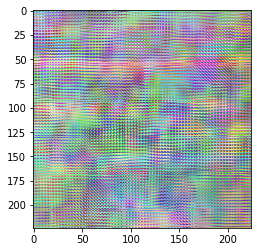

In [22]:
#Check the image and its label
index = 716
plt.imshow(X[index])
print(y[index])

In [23]:
#Encoding data

def vectorize_sequences(sequences, dimension = 1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [24]:
def to_one_hot(y, dimension=6):
    results = np.zeros((len(y), dimension))
    for i, label in enumerate(y):
        results[i, label] = 1.
    return results

In [25]:
one_hot_labels = to_one_hot(y)

In [26]:
one_hot_labels[504]

array([0., 0., 0., 1., 0., 0.])

In [27]:
def load_and_preprocess_from_path_label(X, y):
#     image = tf.image.decode_jpeg(image, channels=1)
#   image = tf.image.resize(image, [im_height, im_width])
    X = 2*tf.cast(X, dtype=tf.float32) / 255.-1
    y = tf.cast(y, dtype=tf.int32)

    return X, y

In [28]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold

In [29]:
kf = StratifiedKFold(n_splits=10)

In [30]:
print(kf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [31]:
for train_index, test_index in kf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Train: [  2   3   4   5   6   7   8   9  10  11  12  13  14  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294

 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916] Test: [  6   7  39  40  41  42  43  44  45  46 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 541 542 543 544 545
 546 547 548 549 550 551 552 553 554 555 556 557 676 677 678 679 680 681
 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792 793 794
 795 796]
Train: [  0   1   2   3   4   5   6   7  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 14

Train: [  0   1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253

In [32]:
from tensorflow.keras import layers, Model, Sequential, regularizers

In [33]:
def entry_flow(inputs) :

    x = Conv2D(32, 7, strides = 2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64,3,padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    previous_block_activation = x

    for size in [128, 256, 728] :

        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = MaxPooling2D(3, strides=2, padding='same')(x)

        residual = Conv2D(size, 1, strides=2, padding='same')(previous_block_activation)

        x = tensorflow.keras.layers.Add()([x, residual])
        previous_block_activation = x

    return x

In [34]:
def middle_flow(x, num_blocks=8) :

    previous_block_activation = x

    for _ in range(num_blocks) :

        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = tensorflow.keras.layers.Add()([x, previous_block_activation])
        previous_block_activation = x

    return x

In [35]:
def exit_flow(x) :

    previous_block_activation = x

    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)

    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x) 
    x = BatchNormalization()(x)

    x = MaxPooling2D(3, strides=2, padding='same')(x)

    residual = Conv2D(1024, 1, strides=2, padding='same')(previous_block_activation)
    x = tensorflow.keras.layers.Add()([x, residual])

    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)

    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(6, activation='linear')(x)

    return x

In [36]:
inputs = Input(shape=(224,224,3))
outputs = exit_flow(middle_flow(entry_flow(inputs)))
xception = Model(inputs, outputs)

In [37]:
import time
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score 

In [38]:
CV_summary = []
t_CV = time.perf_counter()

fold = 0
Final_CM = np.mat(np.zeros((6,6)))
Final_GT = []
Final_pred = []

for i in kf.split(X, y):
    fold += 1
    train_image = X[i[0]]
    train_label = one_hot_labels[i[0]]
    
    test_image = X[i[1]]
    test_label = one_hot_labels[i[1]]

    train_dataset = tf.data.Dataset.from_tensor_slices((train_image,train_label))
    train_db = train_dataset.shuffle(2000).map(load_and_preprocess_from_path_label).batch(10)
    
    test_dataset = tf.data.Dataset.from_tensor_slices((test_image,test_label))
    test_db = test_dataset.shuffle(2000).map(load_and_preprocess_from_path_label).batch(10)
    

    
    t_fold = time.perf_counter()

    model = xception
    model.summary()
    
    optimizer = optimizers.Adam(lr=1e-5)
    
    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

    test_loss = tf.keras.metrics.Mean(name='test_loss')
    test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')


    current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    #CV_log_dir = 'logs/CV' + TOT + str(fold) + '%%' + current_time
    #CV_summary_writer = tf.summary.create_file_writer(CV_log_dir)

    
    CM_summary = np.mat(np.zeros((6,6)))
    Epoch_summary = []

    epochs = 20   #35
    epsilon = 0
    
    for epoch in range(1,epochs+1):
        train_loss.reset_states()  # clear history info
        train_accuracy.reset_states()  # clear history info
        test_loss.reset_states()  # clear history info
        test_accuracy.reset_states()  # clear history info
        
        summary = []
        

        t1 = time.perf_counter()
        for step,(x,y) in enumerate(train_db):

            with tf.GradientTape() as tape:

                logits = model(x, training=True)
                loss = tf.losses.categorical_crossentropy(y, logits, from_logits=True)
#                 loss=tf.nn.softmax_cross_entropy_with_logits(labels = y,logits = logits, dim=-1,name=None)
                loss = tf.reduce_mean(loss)
                train_loss(loss)
                train_accuracy(y, logits)

            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))


    #     with CV_summary_writer.as_default():
    #         tf.summary.scalar('train-CrossEntropy', float(loss), step=epoch)
    #         tf.summary.scalar('train-Accuracy', float(train_accuracy.result() * 100), step=epoch)
        print('-----------------------------------------------------------------')
        print('Training time: ',time.perf_counter() - t1)

        test_pred = []
        test_GT = []
        
        t2 = time.perf_counter()
        for xt,yt in test_db:

            logits = model(xt, training=False)
            prob = tf.nn.softmax(logits, axis=1)
            pred = tf.argmax(prob, axis=1)
            pred = tf.cast(pred, dtype=tf.int32)

            new_label = tf.argmax(yt,axis=1)
            test_pred.extend(pred)
            test_GT.extend(new_label)
            t_loss = tf.losses.categorical_crossentropy(yt, logits, from_logits=True)
#             t_loss=tf.nn.softmax_cross_entropy_with_logits(labels = yt, logits = logits, dim=-1,name=None)
            test_loss(t_loss)
            test_accuracy(yt, logits)
        print('-----------------------------------------------------------------')
        print('Test time: ',time.perf_counter() - t2)


        CM = confusion_matrix(test_GT,test_pred)      
        
        print("Confusion Mtrix")
        print(CM)
        print('\nClassification Report\n')
        print(classification_report(test_GT,test_pred,labels=range(6),target_names=['Normal', 'Thyroiditis', 'Nodule', 
                                                                                    'Goiter', 'Adenoma', 'Cancer']))

        Acc = accuracy_score(test_GT,test_pred)
        if Acc > epsilon:
            epsilon = Acc
            Best_CM = np.array(CM)
            Best_GT = test_GT
            Best_pred = test_pred
            
        print("Current Best Classification Report:")
        print(classification_report(Best_GT, Best_pred,labels=range(6), target_names=['Normal', 'Thyroiditis', 'Nodule', 
                                                                                    'Goiter', 'Adenoma', 'Cancer']))
        print("Current Best CM:")
        print(Best_CM)
        
    Final_CM += Best_CM
    Final_GT.extend(Best_GT)
    Final_pred.extend(Best_pred)
    
#     print("GT:",len(ground_truth),type(ground_truth), ground_truth)
#     print("pred:", len(prediction), type(prediction), prediction)
#     print("F_GT:", len(Final_GT), type(Final_GT), Final_GT)
#     print("F_pre:", len(Final_pred), type(Final_pred), Final_pred)
    
print("---------------------------------------------------------------------")
print("Fold Summary:")
print(classification_report(Final_GT, Final_pred,labels=range(6), target_names=['Normal', 'Thyroiditis', 'Nodule', 
                                                                                    'Goiter', 'Adenoma', 'Cancer']))
print("Final_CM:")
print(Final_CM)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 4736        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

-----------------------------------------------------------------
Training time:  42.91580820000001
-----------------------------------------------------------------
Test time:  1.588345000000004
Confusion Mtrix
[[ 0  0  2  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 20  0  0  0]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.00      0.00      0.00         8
      Nodule       0.43      1.00      0.61        40
      Goiter       0.00      0.00      0.00        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.00      0.00      0.00        20

    accuracy                           0.43        92
   macro avg       0.07      0.17      0.10        92
weighted avg       0.19      0.43      0.26        92

Current Best Classification Report:
              precision    recall  f1-score   support

   

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------------------------------------
Training time:  41.41345720000001
-----------------------------------------------------------------
Test time:  1.5039005999999944
Confusion Mtrix
[[ 0  0  2  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 20  0  0  0]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.00      0.00      0.00         8
      Nodule       0.43      1.00      0.61        40
      Goiter       0.00      0.00      0.00        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.00      0.00      0.00        20

    accuracy                           0.43        92
   macro avg       0.07      0.17      0.10        92
weighted avg       0.19      0.43      0.26        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------------------------------------
Training time:  41.348596000000015
-----------------------------------------------------------------
Test time:  1.509074400000003
Confusion Mtrix
[[ 0  0  2  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 20  0  0  0]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.00      0.00      0.00         8
      Nodule       0.43      1.00      0.61        40
      Goiter       0.00      0.00      0.00        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.00      0.00      0.00        20

    accuracy                           0.43        92
   macro avg       0.07      0.17      0.10        92
weighted avg       0.19      0.43      0.26        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Current Best CM:
[[ 0  0  2  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 20  0  0  0]]
-----------------------------------------------------------------
Training time:  41.36831960000001
-----------------------------------------------------------------
Test time:  1.512145199999992
Confusion Mtrix
[[ 0  0  2  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 20  0  0  0]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.00      0.00      0.00         8
      Nodule       0.43      1.00      0.61        40
      Goiter       0.00      0.00      0.00        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.00      0.00      0.00        20

    accuracy                           0.43        92
   macro avg       0.07      0.17      0.10        92
weig

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Current Best CM:
[[ 0  0  2  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 20  0  0  0]]
-----------------------------------------------------------------
Training time:  41.64808350000001
-----------------------------------------------------------------
Test time:  1.5174940999999933
Confusion Mtrix
[[ 0  0  2  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 20  0  0  0]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.00      0.00      0.00         8
      Nodule       0.43      1.00      0.61        40
      Goiter       0.00      0.00      0.00        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.00      0.00      0.00        20

    accuracy                           0.43        92
   macro avg       0.07      0.17      0.10        92
wei

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------------------------------------
Training time:  41.49213759999998
-----------------------------------------------------------------
Test time:  1.5002686999999924
Confusion Mtrix
[[ 0  0  2  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 20  0  0  0]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.00      0.00      0.00         8
      Nodule       0.43      1.00      0.61        40
      Goiter       0.00      0.00      0.00        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.00      0.00      0.00        20

    accuracy                           0.43        92
   macro avg       0.07      0.17      0.10        92
weighted avg       0.19      0.43      0.26        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------------------------------------
Training time:  41.45116989999997
-----------------------------------------------------------------
Test time:  1.507491899999991
Confusion Mtrix
[[ 0  0  2  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  1 39  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 20  0  0  0]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.00      0.00      0.00         8
      Nodule       0.43      0.97      0.60        40
      Goiter       0.00      0.00      0.00        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.00      0.00      0.00        20

    accuracy                           0.42        92
   macro avg       0.07      0.16      0.10        92
weighted avg       0.19      0.42      0.26        92

Current Best Classification Report:
              precision    recall  f1-score   support

   

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------------------------------------
Training time:  41.4772643
-----------------------------------------------------------------
Test time:  1.5309542999999621
Confusion Mtrix
[[ 0  0  2  0  0  0]
 [ 0  6  2  0  0  0]
 [ 0  4 36  0  0  0]
 [ 0  7  9  0  0  0]
 [ 0  1  5  0  0  0]
 [ 0  8 12  0  0  0]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.23      0.75      0.35         8
      Nodule       0.55      0.90      0.68        40
      Goiter       0.00      0.00      0.00        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.00      0.00      0.00        20

    accuracy                           0.46        92
   macro avg       0.13      0.27      0.17        92
weighted avg       0.26      0.46      0.33        92

Current Best Classification Report:
              precision    recall  f1-score   support

      Nor

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------------------------------------
Training time:  41.534482200000014
-----------------------------------------------------------------
Test time:  1.502691900000002
Confusion Mtrix
[[ 0  0  2  0  0  0]
 [ 0  6  2  0  0  0]
 [ 0  4 30  6  0  0]
 [ 0  4  5  5  2  0]
 [ 0  2  1  3  0  0]
 [ 0  7  9  4  0  0]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.26      0.75      0.39         8
      Nodule       0.61      0.75      0.67        40
      Goiter       0.28      0.31      0.29        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.00      0.00      0.00        20

    accuracy                           0.45        92
   macro avg       0.19      0.30      0.23        92
weighted avg       0.34      0.45      0.38        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Current Best CM:
[[ 0  0  2  0  0  0]
 [ 0  6  2  0  0  0]
 [ 0  4 36  0  0  0]
 [ 0  7  9  0  0  0]
 [ 0  1  5  0  0  0]
 [ 0  8 12  0  0  0]]
-----------------------------------------------------------------
Training time:  41.47690929999999
-----------------------------------------------------------------
Test time:  1.5134051999999656
Confusion Mtrix
[[ 0  0  2  0  0  0]
 [ 0  6  1  1  0  0]
 [ 0  0 37  3  0  0]
 [ 0  1  0 11  4  0]
 [ 0  1  0  5  0  0]
 [ 0  4  6  8  0  2]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.50      0.75      0.60         8
      Nodule       0.80      0.93      0.86        40
      Goiter       0.39      0.69      0.50        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       1.00      0.10      0.18        20

    accuracy                           0.61        92
   macro avg       0.45      0.41      0.36        92
wei

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------------------------------------
Training time:  41.53828490000001
-----------------------------------------------------------------
Test time:  1.5064568999999892
Confusion Mtrix
[[ 0  0  2  0  0  0]
 [ 0  6  0  1  0  1]
 [ 0  2 23 11  1  3]
 [ 0  1  1 12  2  0]
 [ 0  1  0  5  0  0]
 [ 0  2  3  5  0 10]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.50      0.75      0.60         8
      Nodule       0.79      0.57      0.67        40
      Goiter       0.35      0.75      0.48        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.71      0.50      0.59        20

    accuracy                           0.55        92
   macro avg       0.39      0.43      0.39        92
weighted avg       0.60      0.55      0.55        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------------------------------------
Training time:  41.35500010000004
-----------------------------------------------------------------
Test time:  1.497187800000006
Confusion Mtrix
[[ 1  0  0  0  0  1]
 [ 0  7  0  0  0  1]
 [ 0  1 17 14  1  7]
 [ 0  1  0 13  2  0]
 [ 0  0  0  5  0  1]
 [ 0  3  1  4  0 12]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      0.50      0.67         2
 Thyroiditis       0.58      0.88      0.70         8
      Nodule       0.94      0.42      0.59        40
      Goiter       0.36      0.81      0.50        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.55      0.60      0.57        20

    accuracy                           0.54        92
   macro avg       0.57      0.54      0.50        92
weighted avg       0.66      0.54      0.54        92

Current Best Classification Report:
              precision    recall  f1-score   support

   

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------------------------------------
Training time:  41.754347699999926
-----------------------------------------------------------------
Test time:  1.6822650000000294
Confusion Mtrix
[[ 0  1  1  0  0  0]
 [ 0  7  1  0  0  0]
 [ 0  1 38  1  0  0]
 [ 0  1  4  9  2  0]
 [ 0  1  1  4  0  0]
 [ 0  3  9  4  1  3]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.50      0.88      0.64         8
      Nodule       0.70      0.95      0.81        40
      Goiter       0.50      0.56      0.53        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       1.00      0.15      0.26        20

    accuracy                           0.62        92
   macro avg       0.45      0.42      0.37        92
weighted avg       0.65      0.62      0.56        92

Current Best Classification Report:
              precision    recall  f1-score   support

 

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Current Best CM:
[[ 0  1  1  0  0  0]
 [ 0  7  1  0  0  0]
 [ 0  1 38  1  0  0]
 [ 0  1  4  9  2  0]
 [ 0  1  1  4  0  0]
 [ 0  3  9  4  1  3]]
-----------------------------------------------------------------
Training time:  42.10086839999997
-----------------------------------------------------------------
Test time:  1.5033928999999944
Confusion Mtrix
[[ 0  1  1  0  0  0]
 [ 0  7  0  0  0  1]
 [ 0  2 30  3  1  4]
 [ 0  1  1 12  2  0]
 [ 0  1  0  4  0  1]
 [ 0  2  1  4  0 13]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.50      0.88      0.64         8
      Nodule       0.91      0.75      0.82        40
      Goiter       0.52      0.75      0.62        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.68      0.65      0.67        20

    accuracy                           0.67        92
   macro avg       0.44      0.50      0.46        92
wei

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Current Best CM:
[[ 0  1  1  0  0  0]
 [ 0  7  0  0  0  1]
 [ 0  2 30  3  1  4]
 [ 0  1  1 12  2  0]
 [ 0  1  0  4  0  1]
 [ 0  2  1  4  0 13]]
-----------------------------------------------------------------
Training time:  41.351619700000015
-----------------------------------------------------------------
Test time:  1.5052990000000364
Confusion Mtrix
[[ 0  0  0  0  1  1]
 [ 0  7  0  0  0  1]
 [ 0  1 20 11  6  2]
 [ 0  0  1 11  4  0]
 [ 0  1  0  4  0  1]
 [ 0  2  1  0  3 14]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.64      0.88      0.74         8
      Nodule       0.91      0.50      0.65        40
      Goiter       0.42      0.69      0.52        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.74      0.70      0.72        20

    accuracy                           0.57        92
   macro avg       0.45      0.46      0.44        92
we

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------------------------------------
Training time:  41.448562899999956
-----------------------------------------------------------------
Test time:  1.500821999999971
Confusion Mtrix
[[ 1  0  0  0  0  1]
 [ 0  7  0  0  0  1]
 [ 0  1 27  2  2  8]
 [ 0  0  0 11  2  3]
 [ 1  0  0  2  0  3]
 [ 0  2  1  0  0 17]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.50      0.50      0.50         2
 Thyroiditis       0.70      0.88      0.78         8
      Nodule       0.96      0.68      0.79        40
      Goiter       0.73      0.69      0.71        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.52      0.85      0.64        20

    accuracy                           0.68        92
   macro avg       0.57      0.60      0.57        92
weighted avg       0.73      0.68      0.69        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------------------------------------
Training time:  41.51675599999999
-----------------------------------------------------------------
Test time:  1.5280186999999614
Confusion Mtrix
[[ 0  1  1  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  2 35  2  1  0]
 [ 0  1  1 11  3  0]
 [ 0  2  0  4  0  0]
 [ 0  2  3  1  2 12]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.50      1.00      0.67         8
      Nodule       0.88      0.88      0.88        40
      Goiter       0.61      0.69      0.65        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       1.00      0.60      0.75        20

    accuracy                           0.72        92
   macro avg       0.50      0.53      0.49        92
weighted avg       0.75      0.72      0.71        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Current Best CM:
[[ 0  1  1  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  2 35  2  1  0]
 [ 0  1  1 11  3  0]
 [ 0  2  0  4  0  0]
 [ 0  2  3  1  2 12]]
-----------------------------------------------------------------
Training time:  41.56344939999997
-----------------------------------------------------------------
Test time:  1.505478700000026
Confusion Mtrix
[[ 0  0  1  0  0  1]
 [ 0  8  0  0  0  0]
 [ 0  5 31  2  0  2]
 [ 0  2  1 10  3  0]
 [ 0  2  1  2  0  1]
 [ 0  3  1  0  1 15]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.40      1.00      0.57         8
      Nodule       0.89      0.78      0.83        40
      Goiter       0.71      0.62      0.67        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       0.79      0.75      0.77        20

    accuracy                           0.70        92
   macro avg       0.46      0.53      0.47        92
weig

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------------------------------------
Training time:  41.539215199999944
-----------------------------------------------------------------
Test time:  1.506851299999994
Confusion Mtrix
[[ 0  1  0  0  1  0]
 [ 0  7  1  0  0  0]
 [ 0  1 35  4  0  0]
 [ 0  0  2 13  1  0]
 [ 0  0  3  3  0  0]
 [ 0  2  4  3  1 10]]

Classification Report

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         2
 Thyroiditis       0.64      0.88      0.74         8
      Nodule       0.78      0.88      0.82        40
      Goiter       0.57      0.81      0.67        16
     Adenoma       0.00      0.00      0.00         6
      Cancer       1.00      0.50      0.67        20

    accuracy                           0.71        92
   macro avg       0.50      0.51      0.48        92
weighted avg       0.71      0.71      0.68        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

C:\Users\Administrator\anaconda3\envs\New\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Current Best CM:
[[ 0  1  1  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  2 35  2  1  0]
 [ 0  1  1 11  3  0]
 [ 0  2  0  4  0  0]
 [ 0  2  3  1  2 12]]
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 4736        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112,

-----------------------------------------------------------------
Training time:  41.69388589999994
-----------------------------------------------------------------
Test time:  1.5019209000000728
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  1 16  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       0.97      1.00      0.99        39
      Goiter       1.00      0.94      0.97        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           0.99        92
   macro avg       1.00      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

-----------------------------------------------------------------
Test time:  1.5085160000000997
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 38  0  0  1]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  5  1]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      0.97      0.99        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      0.83      0.91         6
      Cancer       0.91      1.00      0.95        20

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00     

-----------------------------------------------------------------
Training time:  41.37759600000004
-----------------------------------------------------------------
Test time:  1.5008569000001444
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

-----------------------------------------------------------------
Test time:  1.5016520000001492
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 16  0  1]
 [ 0  0  0  0  5  1]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      0.94      0.97        17
     Adenoma       1.00      0.83      0.91         6
      Cancer       0.91      1.00      0.95        20

    accuracy                           0.98        92
   macro avg       0.98      0.96      0.97        92
weighted avg       0.98      0.98      0.98        92

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00     

-----------------------------------------------------------------
Training time:  41.70311509999988
-----------------------------------------------------------------
Test time:  1.5081961999999294
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

-----------------------------------------------------------------
Test time:  1.5057131999999456
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00     

-----------------------------------------------------------------
Training time:  41.47530209999968
-----------------------------------------------------------------
Test time:  1.51775090000001
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

    

-----------------------------------------------------------------
Test time:  1.501538900000014
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00      

-----------------------------------------------------------------
Training time:  41.64331129999982
-----------------------------------------------------------------
Test time:  1.5100320999999894
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

-----------------------------------------------------------------
Test time:  1.5039712999996482
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00     


Current Best CM:
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]
-----------------------------------------------------------------
Training time:  41.34785120000015
-----------------------------------------------------------------
Test time:  1.5045995999998922
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
wei

-----------------------------------------------------------------
Training time:  41.31877900000018
-----------------------------------------------------------------
Test time:  1.5131697000001623
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

-----------------------------------------------------------------
Training time:  41.90384479999966
-----------------------------------------------------------------
Test time:  1.5062423999997918
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

-----------------------------------------------------------------
Test time:  1.5075075999998262
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00     


Current Best CM:
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]
-----------------------------------------------------------------
Training time:  41.471674299999904
-----------------------------------------------------------------
Test time:  1.5032980999999381
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
we

-----------------------------------------------------------------
Training time:  41.4717541
-----------------------------------------------------------------
Test time:  1.5008240999995905
Confusion Mtrix
[[ 2  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        39
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

      Nor

-----------------------------------------------------------------
Training time:  41.95603449999999
-----------------------------------------------------------------
Test time:  1.5031170999991446
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

  

-----------------------------------------------------------------
Test time:  1.5078992999997354
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00     

-----------------------------------------------------------------
Training time:  41.463473499999964
-----------------------------------------------------------------
Test time:  1.5024004999995668
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

 

-----------------------------------------------------------------
Test time:  1.5041473999999653
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00     

-----------------------------------------------------------------
Training time:  41.70391929999914
-----------------------------------------------------------------
Test time:  1.510616900000059
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

   

-----------------------------------------------------------------
Test time:  1.5108446999993248
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00     


Current Best CM:
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]
-----------------------------------------------------------------
Training time:  41.40905019999991
-----------------------------------------------------------------
Test time:  1.5077315999997154
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
wei

-----------------------------------------------------------------
Training time:  41.418027699999584
-----------------------------------------------------------------
Test time:  1.5083130999992136
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Current Best Classification Report:
              precision    recall  f1-score   support

 

-----------------------------------------------------------------
Training time:  42.05728509999972
-----------------------------------------------------------------
Test time:  1.5836827000002813
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  3 17]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        17
     Adenoma       0.62      1.00      0.77         5
      Cancer       1.00      0.85      0.92        20

    accuracy                           0.97        91
   macro avg       0.94      0.97      0.95        91
weighted avg       0.98      0.97      0.97        91

Current Best Classification Report:
              precision    recall  f1-score   support

  

-----------------------------------------------------------------
Test time:  1.4990556999991895
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         5
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00     

-----------------------------------------------------------------
Training time:  41.36866809999992
-----------------------------------------------------------------
Test time:  1.4981735000001208
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         5
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Current Best Classification Report:
              precision    recall  f1-score   support

  

-----------------------------------------------------------------
Test time:  1.4928134000001592
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        17
     Adenoma       1.00      1.00      1.00         5
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00     

-----------------------------------------------------------------
Training time:  41.73739240000032
-----------------------------------------------------------------
Test time:  1.4909915999996883
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        16
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Current Best Classification Report:
              precision    recall  f1-score   support

  

-----------------------------------------------------------------
Test time:  1.492630100000497
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        16
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00      

-----------------------------------------------------------------
Training time:  41.50094889999946
-----------------------------------------------------------------
Test time:  1.4928730000001451
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        16
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Current Best Classification Report:
              precision    recall  f1-score   support

  

-----------------------------------------------------------------
Test time:  1.499843100000362
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        16
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00      

-----------------------------------------------------------------
Training time:  41.84380249999958
-----------------------------------------------------------------
Test time:  1.4947242999996888
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        16
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Current Best Classification Report:
              precision    recall  f1-score   support

  

-----------------------------------------------------------------
Test time:  1.4952027999997881
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        16
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00     

-----------------------------------------------------------------
Training time:  41.43090520000078
-----------------------------------------------------------------
Test time:  1.4939661999997043
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        16
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Current Best Classification Report:
              precision    recall  f1-score   support

  

-----------------------------------------------------------------
Test time:  1.493633600000976
Confusion Mtrix
[[ 1  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 40  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 20]]

Classification Report

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00         8
      Nodule       1.00      1.00      1.00        40
      Goiter       1.00      1.00      1.00        16
     Adenoma       1.00      1.00      1.00         6
      Cancer       1.00      1.00      1.00        20

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Current Best Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         1
 Thyroiditis       1.00      1.00      1.00      

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
from keras.utils import to_categorical

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [41]:
log_dir = r'C\Tensorboard_ex\logs_1\fit\'' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

In [42]:
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)